In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("bribes_100.csv")

In [3]:
data.head()

,Unnamed: 0,Title,Department,Details,Amount,State,City,Date
0,0,"Donate your kidney for money urgently today, W...",Others,"Donate your kidney for money urgently today, ...","3,00,00,00,000",Karnataka,Bangalore,"March 26, 2020"
1,1,Passport Verification,Verification and Certificates,Pattinattom police station\nOfficer name Sainu...,150,Kerala,Ernakulam,"March 26, 2020"
2,2,Bribe for chai pani,FIR and Complaints,A police officer came sitting in his vehicle M...,"5,000",Maharashtra,Mumbai,"March 23, 2020"
3,3,Bribe from bar owners,Autorickshaws,"Vinod kumar, who is working as sub inspector i...","1,00,000",Kerala,Tiruchirapalli,"March 21, 2020"
4,4,TRANSFER ONE STATE TO OTHER,Others,He is in ministry of finance. 2019 in January ...,"2,50,000",Delhi,New Delhi,"March 20, 2020"


In [4]:
data['Department'].nunique

<bound method IndexOpsMixin.nunique of 0                             Others
1      Verification and Certificates
2                 FIR and Complaints
3                      Autorickshaws
4                             Others
                   ...              
995          Births, Family and Care
996               FIR and Complaints
997                       Filing FIR
998             Building and Housing
999                     Certificates
Name: Department, Length: 1000, dtype: object>

In [5]:
data['Amount'].dtype

dtype('O')

In [6]:
def amount_converter(x):
    value=x.split(',')
    value=''.join(value)
    value=int(value)
    return value
data['Amount']=data['Amount'].apply(amount_converter)
data['Amount'].head(1)

0    3000000000
Name: Amount, dtype: int64

In [7]:
data.groupby('Department')['Amount'].sum()

Department
Aadhaar Card                         50500
Aadhaar Card Process                582610
Allotment of subsidized housing     900000
Assessment                          190500
Autorickshaws                      1030500
                                    ...   
Vehicle Insurance                     1500
Verification and Certificates        31900
Visa                                  2206
Voter Registration                      50
Water Connection                     41500
Name: Amount, Length: 121, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [9]:
Department_wise=data.groupby('Department')['Amount'].sum()

In [10]:
 Department_wise=Department_wise.sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

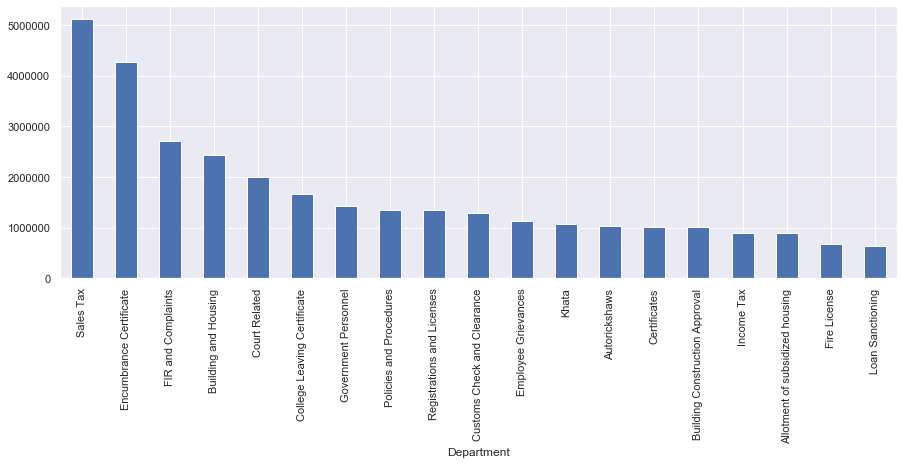

In [11]:
plt.figure(figsize=(15,5))
Department_wise[1:20].plot(kind='bar')
plt.xticks(rotation=90)

In [12]:
data.groupby('State')['Amount'].sum()

State
 Andhra Pradesh                862778
 Assam                          83759
 Bihar                        2567213
 Chhattisgarh                   80000
 Dadra and Nagar Haveli         15000
 Delhi                        3772937
 Goa                             4950
 Gujarat                        61250
 Haryana                      4426793
 Himachal Pradesh               30000
 Jammu and Kashmir                500
 Jharkhand                     846185
 Karnataka                 3010079929
 Kerala                        311750
 Madhya Pradesh               1536966
 Maharashtra                 10106750
 Orissa                         36200
 Pondicherry                     5000
 Punjab                        421944
 Rajasthan                     452380
 Tamil Nadu                   3038904
 Telangana                    1380229
 Tripura                        10299
 Uttar Pradesh                4515619
 Uttarakhand                   867700
 West Bengal                  2611100
Name: 

In [13]:
state_wise=data.groupby('State')['Amount'].sum()

In [14]:
state_wise=state_wise.sort_values(ascending=False)

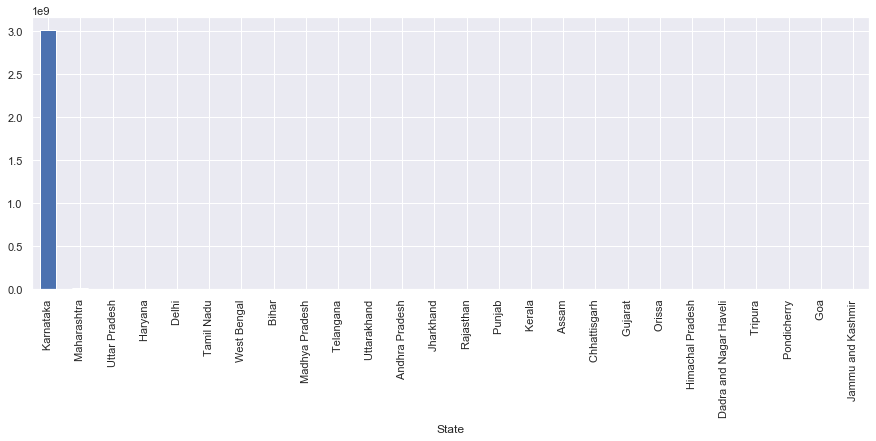

In [15]:
plt.figure(figsize=(15,5))
state_wise.plot(kind='bar')


In [16]:
data.groupby('City')['Amount'].sum().sort_values(ascending=False)

City
Bangalore        3008489729
Mumbai              4931650
New Delhi           3772937
Pune                3547100
Gurgaon             3075200
                    ...    
Amadalavalasa            22
Fatehpur                 12
Karur                     5
Palia Kalan               5
Rudauli                   1
Name: Amount, Length: 262, dtype: int64

In [17]:
city_wise=data.groupby('City')['Amount'].sum().sort_values(ascending=False)

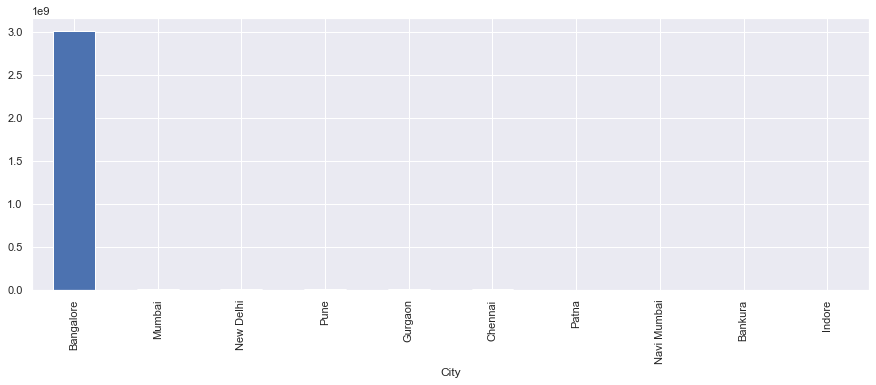

In [18]:
plt.figure(figsize=(15,5))
city_wise[:10].plot(kind='bar')

([<matplotlib.patches.Wedge at 0x23e536c5288>,
 [Text(-1.0991543899783829, 0.04312339262220713, ' Karnataka'),
  Text(1.0974570617008776, -0.07475291113312067, ' Maharashtra'),
  Text(1.0984589720491424, -0.05820555578930222, ' Uttar Pradesh'),
  Text(1.098948768264485, -0.04807915067855748, ' Haryana'),
  Text(1.0993158437233266, -0.038790150023822266, ' Delhi'),
  Text(1.099561083328631, -0.031071273375386652, ' Tamil Nadu'),
  Text(1.0997233750334767, -0.024667760437040578, ' West Bengal'),
  Text(1.0998393661057315, -0.018798105333861663, ' Bihar'),
  Text(1.099909042599143, -0.014145600327907272, ' Madhya Pradesh'),
  Text(1.0999466018096298, -0.010838503930336781, ' Telangana'),
  Text(1.0999687609016928, -0.008290056718434366, ' Uttarakhand'),
  Text(1.0999817970363366, -0.00632820580512712, ' Andhra Pradesh'),
  Text(1.0999912370189249, -0.004390726770778644, ' Jharkhand'),
  Text(1.0999961283027726, -0.0029185131335181793, ' Rajasthan'),
  Text(1.0999983116517877, -0.001927268

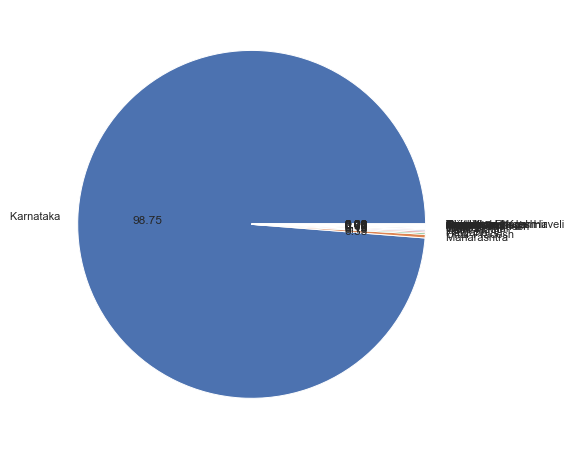

In [21]:
sns.set(rc={'figure.figsize':(15,8)})
plt.pie(state_wise, labels=state_wise.index, autopct="%.2f")

([<matplotlib.patches.Wedge at 0x23e53d1d0c8>,
 [Text(-1.0994419131749853, 0.03503540429520275, 'Bangalore'),
  Text(1.098110967382632, -0.06443836833735495, 'Mumbai'),
  Text(1.0986462968996014, -0.054555607491745005, 'New Delhi'),
  Text(1.0990276329538817, -0.046241345177102246, 'Pune'),
  Text(1.099318412081545, -0.03871729404944192, 'Gurgaon'),
  Text(1.0995188568075829, -0.03253126994979009, 'Chennai'),
  Text(1.099634916125293, -0.028338158693181684, 'Patna'),
  Text(1.0997050273027216, -0.02547259164514943, 'Navi Mumbai'),
  Text(1.0997624780901831, -0.02285807920494614, 'Bankura'),
  Text(1.0998102781855947, -0.02042919473021495, 'Indore'),
  Text(1.0998508830641225, -0.018111737163240094, 'Agra'),
  Text(1.0998860129723087, -0.01583535499692201, 'Sirsi'),
  Text(1.0999164075864014, -0.01356083781428741, 'Rewari'),
  Text(1.0999420939348936, -0.011286717420118034, 'Bellary'),
  Text(1.0999621391064955, -0.00912647425146991, 'Bhabua'),
  Text(1.0999764854517835, -0.007192458073

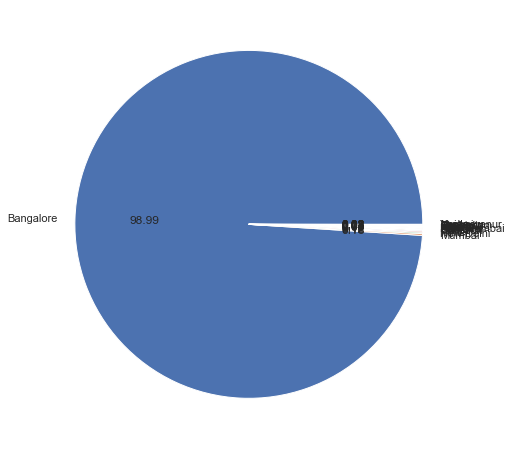

In [22]:
sns.set(rc={'figure.figsize':(15,8)})
plt.pie(city_wise[:20], labels=city_wise[:20].index, autopct="%.2f")

# visulasing top 5 departments for which corruption has been reported in Karnataka

Series([], Name: Amount, dtype: int64)